#  Método de Runge-Kutta para EDO acopladas y de segundo orden

**Ejemplo sistemas de EDO acopladas (Ecuaciones de Lotka-Volterra):** Ecuaciones diferenciales acopladas, usadas comúnmente para modelos de depredador-presa en biología. Sean *x,y* dos poblaciones, la manera en la que ambas cambian con el tiempo está dada por el siguiente sistema de ecuaciones: \\
*dx/dt = αx - βxy*, \\
*dy/dt = δxy - γy* \\
Los términos que acompañan los coeficientes β y δ indican la interacción entre ambas poblaciones. \\
Resolver el sistema de Lotka-Volterra para *0<=t<=100* utilizando el *método de RK4*, considerando que *α = 1.1*, *β = 0.4*, *δ = 0.1* y *γ = 0.4*. Las condiciones iniciales son *x(0) = 20* y *y(0) = 45*.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Resolver EDO acopladas simplemente consiste en aplicar el método de RK4 de forma simultánea a todas las ecuaciones que tengamos:

alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.4

def f(t,x,y):
  return alpha*x - beta*x*y

def g(t,x,y):
  return delta*x*y - gamma*y

# Condiciones iniciales y MRK4:

x = 20
y = 45
t = 0
X = [x]
Y = [y]
T = [t]

h = 0.001
while t<=100:
    k1x = f(t,x,y)
    k1y = g(t,x,y)
    k2x = f(t+0.5*h,x+0.5*k1x*h,y+0.5*k1y*h)
    k2y = g(t+0.5*h,x+0.5*k1x*h,y+0.5*k1y*h)
    k3x = f(t+0.5*h,x+0.5*k2x*h,y+0.5*k2y*h)
    k3y = g(t+0.5*h,x+0.5*k2y*h,y+0.5*k2y*h)
    k4x = f(t+h,x+k3x*h,y+k3y*h)
    k4y = g(t+h,x+k3x*h,y+k3y*h)
    x += (k1x+2*k2x+2*k3x+k4x)*h/6
    y += (k1y+2*k2y+2*k3y+k4y)*h/6
    t += h
    X.append(x)
    Y.append(y)
    T.append(t)

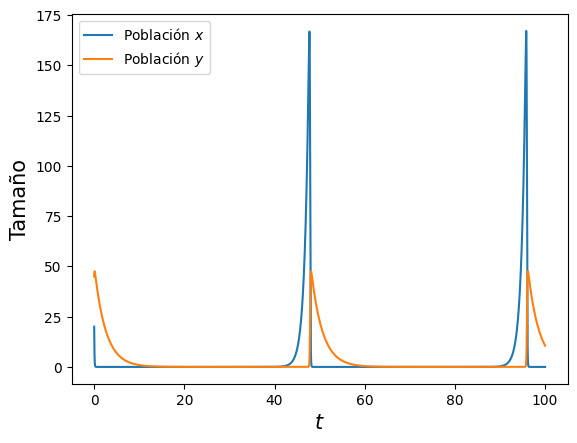

In [ ]:
plt.plot(T,X,label='Población $x$')
plt.plot(T,Y,label='Población $y$')
plt.xlabel('$t$',size=15)
plt.ylabel('Tamaño',size =15)
plt.legend()
plt.show()

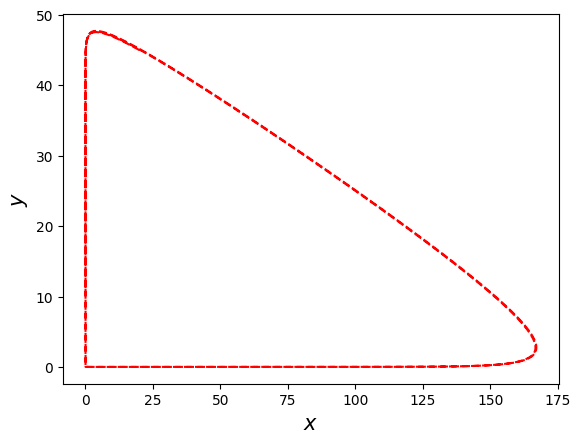

In [ ]:
# Si quisieramos ver el comportamiento dinámico en el "espacio de fase".

plt.plot(X,Y,'r--')
plt.xlabel('$x$',size=15)
plt.ylabel('$y$',size =15)
plt.show()

**Ejemplo EDO de segundo orden (Oscilador forzado):** La ecuación diferencial que describe a un oscilador armónico forzado es la siguiente: \\
*mx'' + γx' + kx = F(t) -> x'' = (1/m)(F(t) - γx' - kx)*, \\
siendo *F* la fuerza externa aplicada. \\
Podemos separar la EDO de segundo orden en las siguientes dos EDO de primer orden acopladas: \\
*dx/dt = v* \\
*dv/dt = (F- γv - kx)/m* \\
Considerando que *F(t) = cos(t)*, y que *m = 1.1*, *γ = 0.01* y *k = 0.1*, resuelva la ecuación del oscilador forzado utilizando el *método de RK4* para *0<=t<=50* y *h=0.001*. Las condiciones inciales son *x(0) = 1* y *x'(0) = 0*.

In [ ]:
# Para EDO de orden n, podemos separarla en n EDO de primer orden acopladas, de forma análoga a como se hace en el ejemplo. En este caso, tenemos:

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
m = 1.1
gamma = 0.01
k = 0.1

def f(t,x,v):
  return v

def g(t,x,v):
  return np.cos(t) - gamma*v - k*x

x = 1
v = 0
t = 0
X = [x]
V = [v]
T = [t]
h = 0.001
while t<=50:
  k1x = f(t,x,v)
  k1v = g(t,x,v)
  k2x = f(t+0.5*h,x+0.5*k1x*h,v+0.5*k1v*h)
  k2v = g(t+0.5*h,x+0.5*k1x*h,v+0.5*k1v*h)
  k3x = f(t+0.5*h,x+0.5*k2x*h,v+0.5*k2v*h)
  k3v = g(t+0.5*h,x+0.5*k2y*h,v+0.5*k2v*h)
  k4x = f(t+h,x+k3x*h,v+k3v*h)
  k4v = g(t+h,x+k3x*h,v+k3v*h)
  x += (k1x+2*k2x+2*k3x+k4x)*h/6
  v += (k1v+2*k2v+2*k3v+k4v)*h/6
  t += h
  X.append(x)
  V.append(v)
  T.append(t)

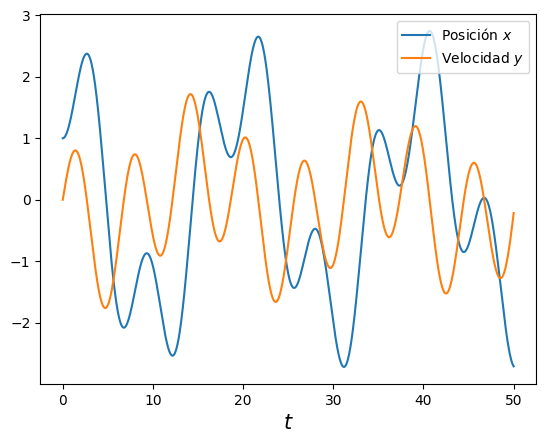

In [ ]:
plt.plot(T,X,label='Posición $x$')
plt.plot(T,V,label='Velocidad $y$')
plt.xlabel('$t$',size=15)
plt.legend(loc='upper right')
plt.show()